In [393]:
# importing fundamental libraries

import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lasio 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
# Import Normalizer
from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
# setting visualization standards
sns.set()

%matplotlib inline

In [394]:
# 1. reading .las files from local directory

las_1 = lasio.read(r"C:\Users\suhaga\Documents\Kick Detection Project\Python Scripts\a_suite1.las")

# 2. manipulating the .las file to an excel equivalent dataframe

df_las_1 = las_1.df()

# repeating steps 1 and 2 for other .las files

las_2 = lasio.read(r"C:\Users\suhaga\Documents\Kick Detection Project\Python Scripts\a_suite2.las")
df_las_2 = las_2.df()
las_3 = lasio.read(r"C:\Users\suhaga\Documents\Kick Detection Project\Python Scripts\a_suite3.las")
df_las_3 = las_3.df()

### 1. Data Wrangling

In [395]:
# meta-data

print("\n Meta Data :\n")
print(las_1.curvesdict)

print("\n Meta Data :\n")
print(las_2.curvesdict)

print("\n Meta Data :\n")
print(las_3.curvesdict)



 Meta Data :

{'DEPT': CurveItem(mnemonic=DEPT, unit=M, value=00 000 000 000, descr=, original_mnemonic=DEPT, data.shape=(8280,)), 'BS': CurveItem(mnemonic=BS, unit=IN, value=00 000 000 000, descr=BIT SIZE, original_mnemonic=BS, data.shape=(8280,)), 'CALI': CurveItem(mnemonic=CALI, unit=IN, value=00 000 000 000, descr=CALIPER, original_mnemonic=CALI, data.shape=(8280,)), 'DT': CurveItem(mnemonic=DT, unit=US/F, value=00 000 000 000, descr=DELTA TIME COMPRESSIVE, original_mnemonic=DT, data.shape=(8280,)), 'GR': CurveItem(mnemonic=GR, unit=GAPI, value=00 000 000 000, descr=NATURAL GAMMA RAY, original_mnemonic=GR, data.shape=(8280,)), 'ITT': CurveItem(mnemonic=ITT, unit=, value=00 000 000 000, descr=INTEGRATED TRAVEL TIME MARK, original_mnemonic=ITT, data.shape=(8280,)), 'TENS': CurveItem(mnemonic=TENS, unit=LBS, value=00 000 000 000, descr=CABLE TENSION, original_mnemonic=TENS, data.shape=(8280,))}

 Meta Data :

{'DEPT': CurveItem(mnemonic=DEPT, unit=M, value=00 000 000 000, descr=, ori

In [396]:
# Merging all kick indicators in one dataframe ----> kick_KPI

#kick_KPI = pd.concat([df_las_1['DT'],df_las_2['RHOB'],df_las_3['MSFLA'],df_las_3['SP']],axis=1)

kick_KPI = pd.concat([df_las_1['DT'],df_las_2['RHOB'],df_las_3['MSFLA']],axis=1)

kick_KPI.head()

kick_KPI.dropna(inplace=True)

print("\n\n Size of column concatenated dataframe: \n")
kick_KPI.info()

print("\n\n First five values: \n")
print(kick_KPI.head())




 Size of column concatenated dataframe: 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 625 entries, 1104.5 to 1166.9
Data columns (total 3 columns):
DT       625 non-null float64
RHOB     625 non-null float64
MSFLA    625 non-null float64
dtypes: float64(3)
memory usage: 19.5 KB


 First five values: 

             DT    RHOB   MSFLA
DEPT                           
1104.5  89.0938  2.5559  3.9931
1104.6  89.2656  2.5586  4.3580
1104.7  90.1406  2.5605  4.7334
1104.8  90.6094  2.5650  4.2969
1104.9  90.9062  2.5720  4.8332


In [397]:
## outlier removal

print(kick_KPI.head())

def outlier(df,column):
    df['upper_limit_'+ column] = df.mean()[column] + 3*df.std()[column]

    df['lower_limit_'+ column] = df.mean()[column] - 3*df.std()[column]
    
    print("\n With outliers")
    df[[column,'upper_limit_'+ column,'lower_limit_'+ column]].plot()
    plt.show()
    
    droppers = list(df[column][(df[column]<=df['lower_limit_'+ column]) | (df[column]>=df['upper_limit_'+ column])].index)
    df.drop(droppers,axis=0,inplace=True)

    print("\n Without outlier")
    df[[column,'upper_limit_'+ column,'lower_limit_'+ column]].plot()
    plt.show()
 


             DT    RHOB   MSFLA
DEPT                           
1104.5  89.0938  2.5559  3.9931
1104.6  89.2656  2.5586  4.3580
1104.7  90.1406  2.5605  4.7334
1104.8  90.6094  2.5650  4.2969
1104.9  90.9062  2.5720  4.8332



 With outliers


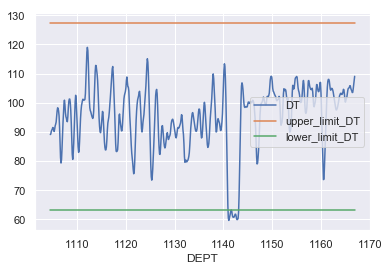


 Without outlier


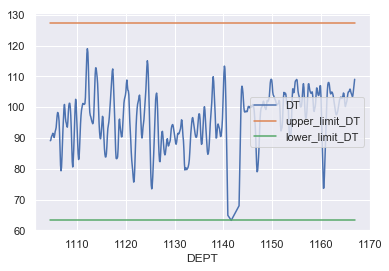


 With outliers


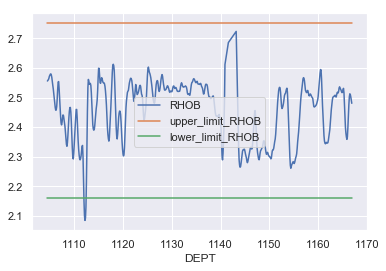


 Without outlier


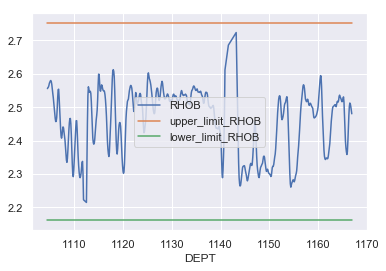


 With outliers


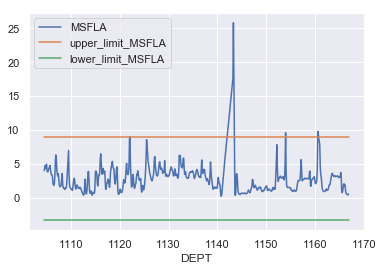


 Without outlier


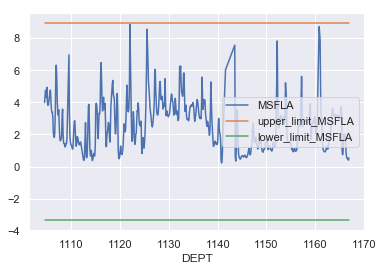

In [398]:
for i in kick_KPI.columns:
    outlier(kick_KPI,i)

In [399]:
kick_KPI.info()

#kick_KPI = kick_KPI[['DT','RHOB','MSFLA','SP']]

kick_KPI = kick_KPI[['DT','RHOB','MSFLA']]

kick_KPI.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 592 entries, 1104.5 to 1166.9
Data columns (total 9 columns):
DT                   592 non-null float64
RHOB                 592 non-null float64
MSFLA                592 non-null float64
upper_limit_DT       592 non-null float64
lower_limit_DT       592 non-null float64
upper_limit_RHOB     592 non-null float64
lower_limit_RHOB     592 non-null float64
upper_limit_MSFLA    592 non-null float64
lower_limit_MSFLA    592 non-null float64
dtypes: float64(9)
memory usage: 46.2 KB
<class 'pandas.core.frame.DataFrame'>
Float64Index: 592 entries, 1104.5 to 1166.9
Data columns (total 3 columns):
DT       592 non-null float64
RHOB     592 non-null float64
MSFLA    592 non-null float64
dtypes: float64(3)
memory usage: 18.5 KB


In [400]:
print("\n\n Size of column concatenated dataframe without outliers: \n")
kick_KPI.info()

print("\n\n First five values without outliers: \n")
print(kick_KPI.head())




 Size of column concatenated dataframe without outliers: 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 592 entries, 1104.5 to 1166.9
Data columns (total 3 columns):
DT       592 non-null float64
RHOB     592 non-null float64
MSFLA    592 non-null float64
dtypes: float64(3)
memory usage: 18.5 KB


 First five values without outliers: 

             DT    RHOB   MSFLA
DEPT                           
1104.5  89.0938  2.5559  3.9931
1104.6  89.2656  2.5586  4.3580
1104.7  90.1406  2.5605  4.7334
1104.8  90.6094  2.5650  4.2969
1104.9  90.9062  2.5720  4.8332


### 2. Exploratory data analysis

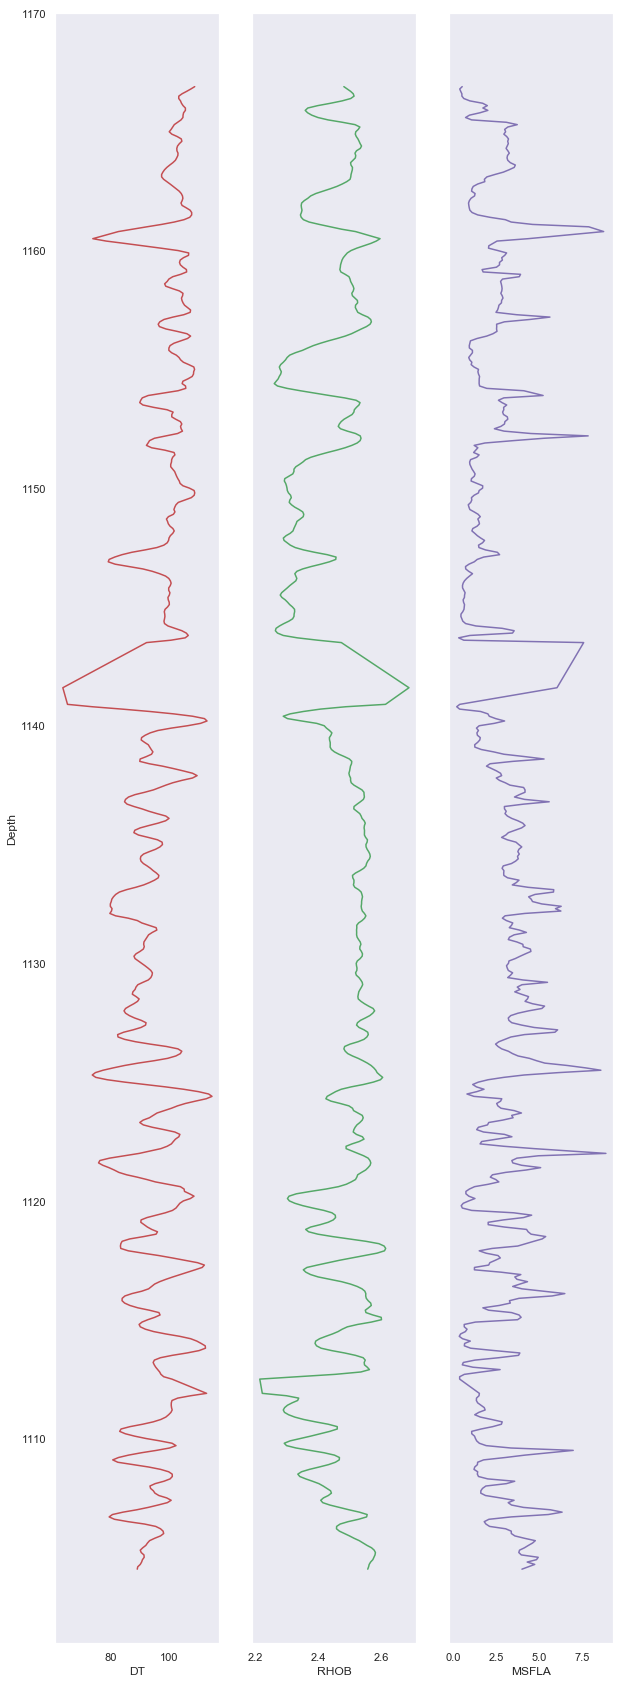

In [401]:
# viz

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True,figsize=(10,30))

ax1.plot(kick_KPI.DT, kick_KPI.index,'r')
ax1.set(ylabel = 'Depth',xlabel = 'DT')
ax1.yaxis.grid()
ax1.xaxis.grid()

ax2.plot(kick_KPI.RHOB, kick_KPI.index,'g')
ax2.set(xlabel='RHOB')
ax2.yaxis.grid()
ax2.xaxis.grid()

ax3.plot(kick_KPI.MSFLA,kick_KPI.index,'m')
ax3.set(xlabel='MSFLA')
ax3.yaxis.grid()
ax3.xaxis.grid()

#ax4.plot(kick_KPI.SP,kick_KPI.index)
#ax4.set(xlabel = 'SP')
#ax4.yaxis.grid()
#ax4.xaxis.grid()

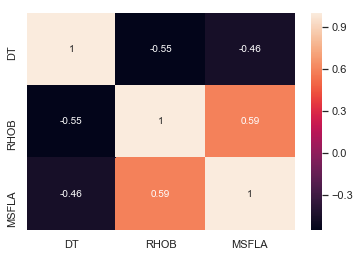

In [402]:
# correlation heatmap

import seaborn as sns
sns.heatmap(kick_KPI.corr(),annot=True)

##### Note :Negative correlation between DT and {MSFLA,RHOB}. Why negative between DT and MSFLA ?----------> Linked ?
##### Note :Positive correlation between MSFLA and RHOB. Why ? ------------>


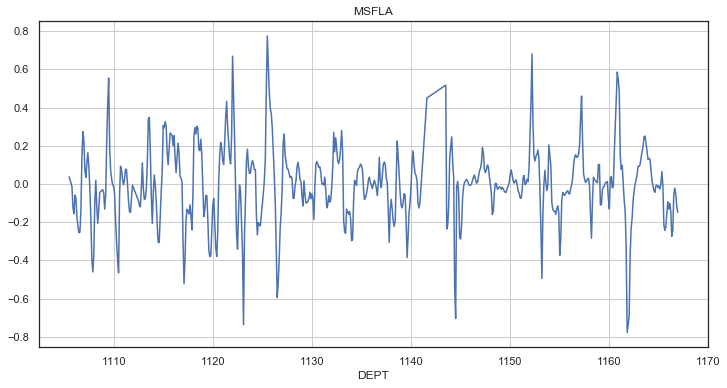

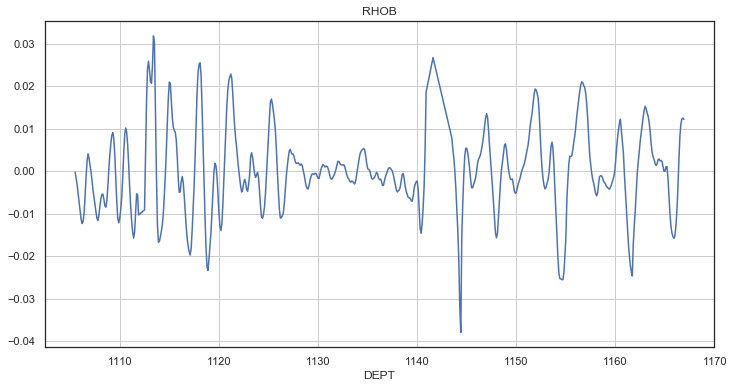

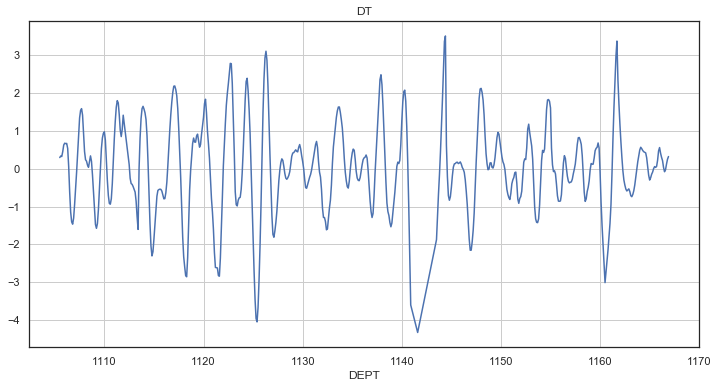

In [427]:
# viz changes in KPI

kick_KPI_change = kick_KPI.rolling(10).mean().diff()
kick_KPI_change.head(15)

#double diff 
direction = kick_KPI_change.diff()

plt.figure(1)
kick_KPI_change['MSFLA'].plot(sharex=True,grid=True)
plt.title('MSFLA')

plt.figure(2)
plt.title('RHOB')
kick_KPI_change['RHOB'].plot(sharex=True,grid=True)

plt.figure(3)
plt.title('DT')
kick_KPI_change['DT'].plot(sharex=True,grid=True)

In [404]:
# is outlier threshold useful for isolating extreme jumps in KPIs <---------- alt kick fingerprinting ?

def outlier_threshold(df,column):
    
    
    df['upper_limit_'+ column] = df.mean()[column] + 3*df.std()[column]

    df['lower_limit_'+ column] = df.mean()[column] - 3*df.std()[column]
    
    print("\n With outliers : "+ column)
    df[[column,'upper_limit_'+ column,'lower_limit_'+ column]].plot()
    plt.show()



 With outliers : DT


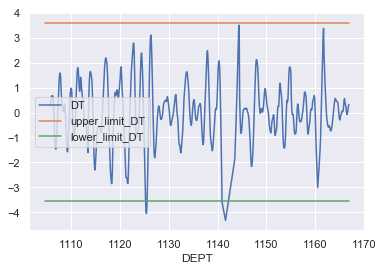


 With outliers : RHOB


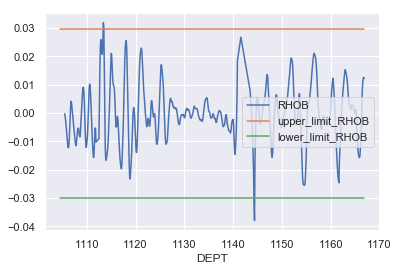


 With outliers : MSFLA


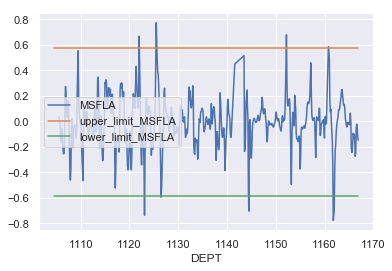

In [405]:
for i in kick_KPI_change.columns:
    outlier_threshold(kick_KPI_change,i)


 With outliers : DT


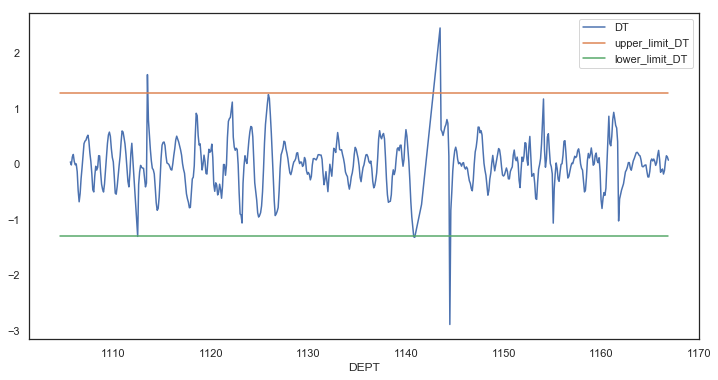


 With outliers : RHOB


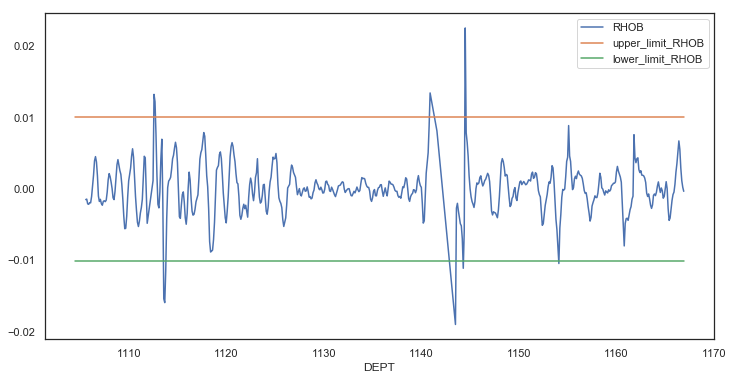


 With outliers : MSFLA


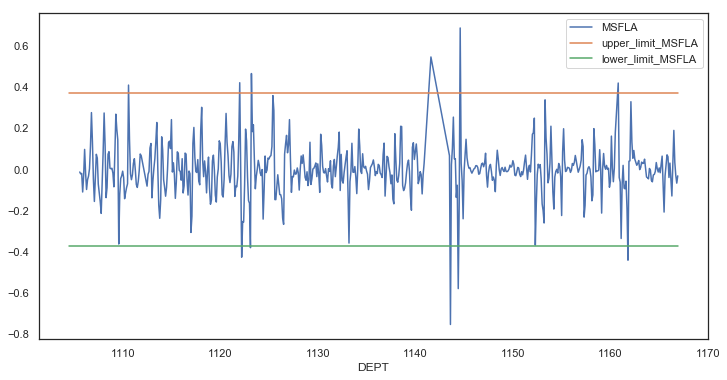

In [428]:
for i in direction.columns:
    outlier_2(direction,i)

##### Note: Direction of change important. 

##### Note: Sudden decrease in RHOB,DT indicate kick <-------------- conditions apply. what conditions ?

###### Note: A sudden increase in MSFLA should indicate kick <------------ conditions apply. what condition ?

##### Note: User defined DAG for bayesian networks <---------------- visit this

In [406]:
# z-score scaling : z = (x-mu)/sigma <-------- good for kmeans

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

kick_KPI_scaled = scaler.fit_transform(kick_KPI)

#kick_KPI_scaled = pd.DataFrame(kick_KPI_scaled,index=kick_KPI.index,columns=['DT','RHOB','MSFLA','SP'])

kick_KPI_scaled = pd.DataFrame(kick_KPI_scaled,index=kick_KPI.index,columns=['DT','RHOB','MSFLA'])

print(kick_KPI_scaled.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 592 entries, 1104.5 to 1166.9
Data columns (total 3 columns):
DT       592 non-null float64
RHOB     592 non-null float64
MSFLA    592 non-null float64
dtypes: float64(3)
memory usage: 18.5 KB
None


In [407]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2)

labels = kmeans_model.fit_predict(kick_KPI_scaled)

print(labels.shape)

(592,)


In [408]:
kick_KPI_scaled['label_kmean'] = labels

In [409]:
kick_KPI_scaled['label_kmean'].value_counts()

1    325
0    267
Name: label_kmean, dtype: int64

k value =
[1, 2, 3, 4, 5, 6, 7, 8, 9]
Inertia = 
[1922.5793918918914, 927.6631751485336, 713.8358699134483, 592.6211606709217, 488.0204493577329, 423.45996091891345, 382.15075154115914, 345.2997676112801, 317.56792366656543]


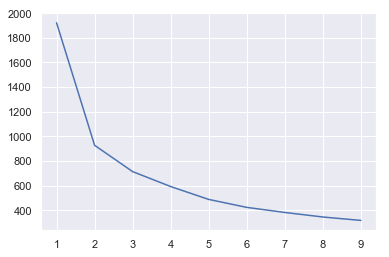

In [410]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans_model=KMeans(n_clusters=k , random_state=3425)
    
    # Fit model to samples
    kmeans_model.fit(kick_KPI_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans_model.inertia_)
    
plt.plot(ks,inertias)

print("k value =")
print(list(ks))
print('Inertia = ')
print(inertias)

where is the point of inflection ? k = 2 or k = 3?

In [411]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(kick_KPI_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(kick_KPI_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4555591239695593
For n_clusters = 3 The average silhouette_score is : 0.34623448661033585
For n_clusters = 4 The average silhouette_score is : 0.32712725631066
For n_clusters = 5 The average silhouette_score is : 0.3402869913799861
For n_clusters = 6 The average silhouette_score is : 0.3428697570702427
For n_clusters = 7 The average silhouette_score is : 0.3434246900942345
For n_clusters = 8 The average silhouette_score is : 0.33459519520913555
For n_clusters = 9 The average silhouette_score is : 0.33367314529102526


highest silhoutte score is @ k = 2

 ### Reducing dimensions for viz

In [412]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_kick_KPI = pca.fit_transform(kick_KPI_scaled)

In [413]:
pca_kick_KPI

array([[ 1.68063451,  0.01619339],
       [ 1.81724114, -0.1540843 ],
       [ 1.90812495, -0.39197424],
       ...,
       [-1.2932986 , -0.00502437],
       [-1.47273091, -0.10396098],
       [-1.57425952, -0.27406848]])

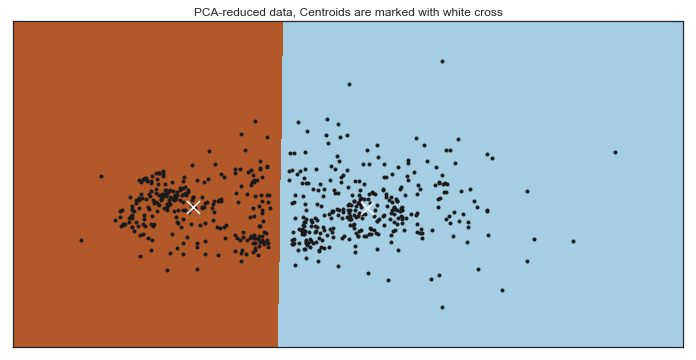

In [414]:
 ##Visualize the results on PCA-reduced data

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(pca_kick_KPI)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = pca_kick_KPI[:, 0].min() - 1, pca_kick_KPI[:, 0].max() + 1
y_min, y_max = pca_kick_KPI[:, 1].min() - 1, pca_kick_KPI[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
labels = Z

# Put the result into a color plot
Z = Z.reshape(xx.shape)

sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(pca_kick_KPI[:, 0], pca_kick_KPI[:, 1], 'k.', markersize=6)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w',  zorder=10)
plt.title('PCA-reduced data, Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

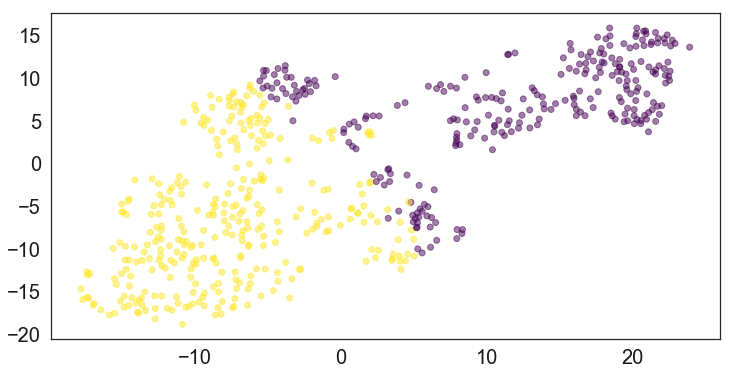

In [415]:
#t-SNE on scaled data

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200, random_state=10, perplexity=50)
y=kick_KPI_scaled['label_kmean']
# Apply fit_transform to samples: tsne_features
#tsne_features = model.fit_transform(kick_KPI_scaled[['DT','RHOB','MSFLA','SP']])
tsne_features = model.fit_transform(kick_KPI_scaled[['DT','RHOB','MSFLA']])

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y,alpha=0.5, cmap = 'viridis' ) #
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
plt.show()


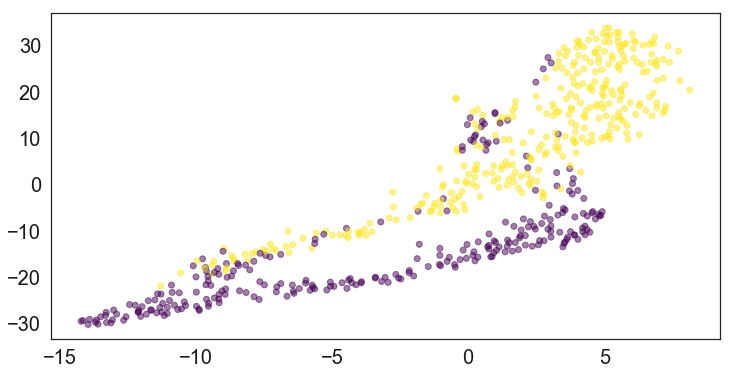

In [416]:
#t-SNE on unscaled raw data   <-------------- revisit

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200, random_state=10, perplexity=50)
y=kick_KPI_scaled['label_kmean']
# Apply fit_transform to samples: tsne_features
#tsne_features = model.fit_transform(kick_KPI_scaled[['DT','RHOB','MSFLA','SP']])
tsne_features = model.fit_transform(kick_KPI[['DT','RHOB','MSFLA']])

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y,alpha=0.5, cmap = 'viridis' ) #
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
plt.show()


### Plotting cluster along with well log

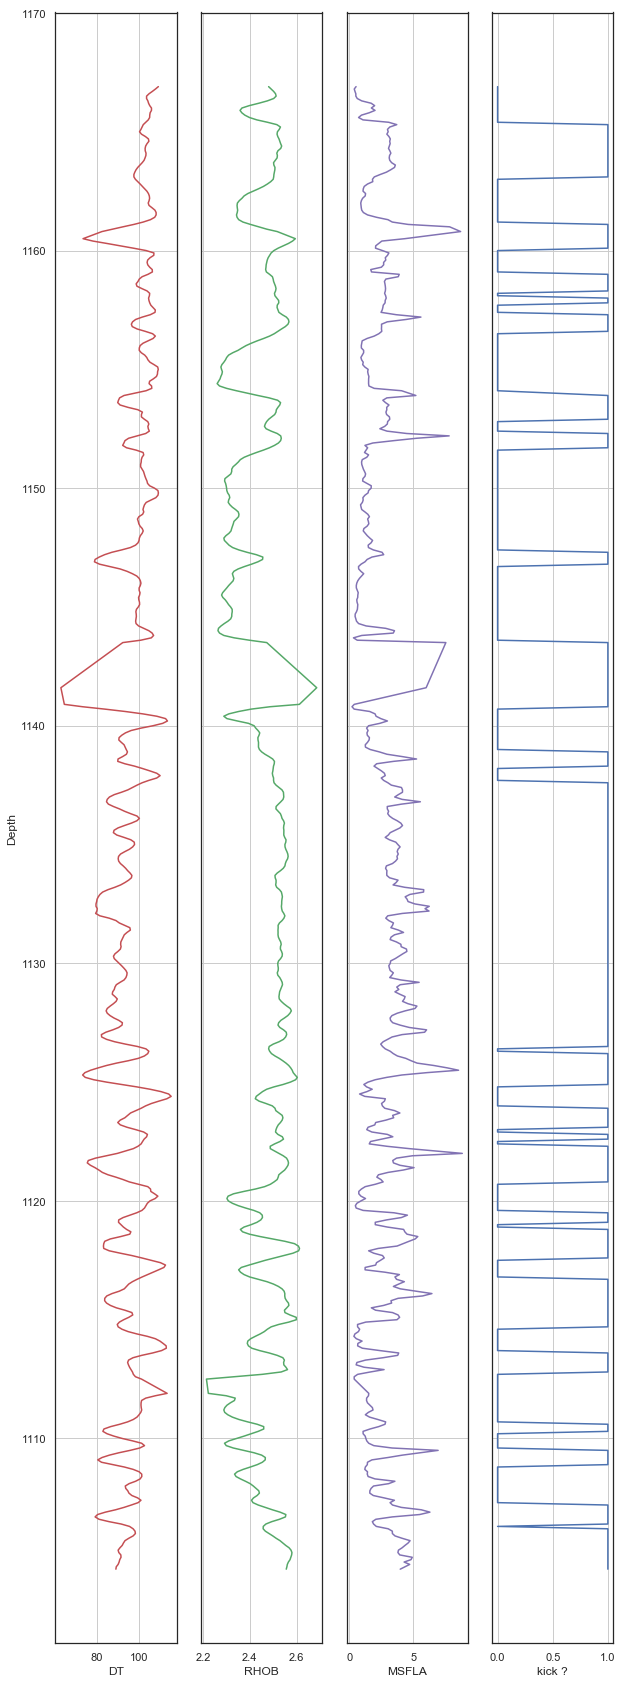

In [417]:

fig, (ax1, ax2, ax3, ax5) = plt.subplots(1, 4,sharey=True,figsize=(10,30))

ax1.plot(kick_KPI.DT, kick_KPI.index,'r')
ax1.set(ylabel = 'Depth',xlabel = 'DT')
ax1.yaxis.grid()
ax1.xaxis.grid()

ax2.plot(kick_KPI.RHOB, kick_KPI.index,'g')
ax2.set(xlabel='RHOB')
ax2.yaxis.grid()
ax2.xaxis.grid()

ax3.plot(kick_KPI.MSFLA,kick_KPI.index,'m')
ax3.set(xlabel='MSFLA')
ax3.yaxis.grid()
ax3.xaxis.grid()

#ax4.plot(kick_KPI.SP,kick_KPI.index)
#ax4.set(xlabel = 'SP')
#ax4.yaxis.grid()
#ax4.xaxis.grid()

ax5.plot(kick_KPI_scaled['label_kmean'],kick_KPI_scaled.index)
ax5.set(xlabel = 'kick ?')
ax5.xaxis.grid()
ax5.yaxis.grid()


In [418]:
_0 = list(kick_KPI_scaled[kick_KPI_scaled['label_kmean']==0].index)

_1 = list(kick_KPI_scaled[kick_KPI_scaled['label_kmean']==1].index)

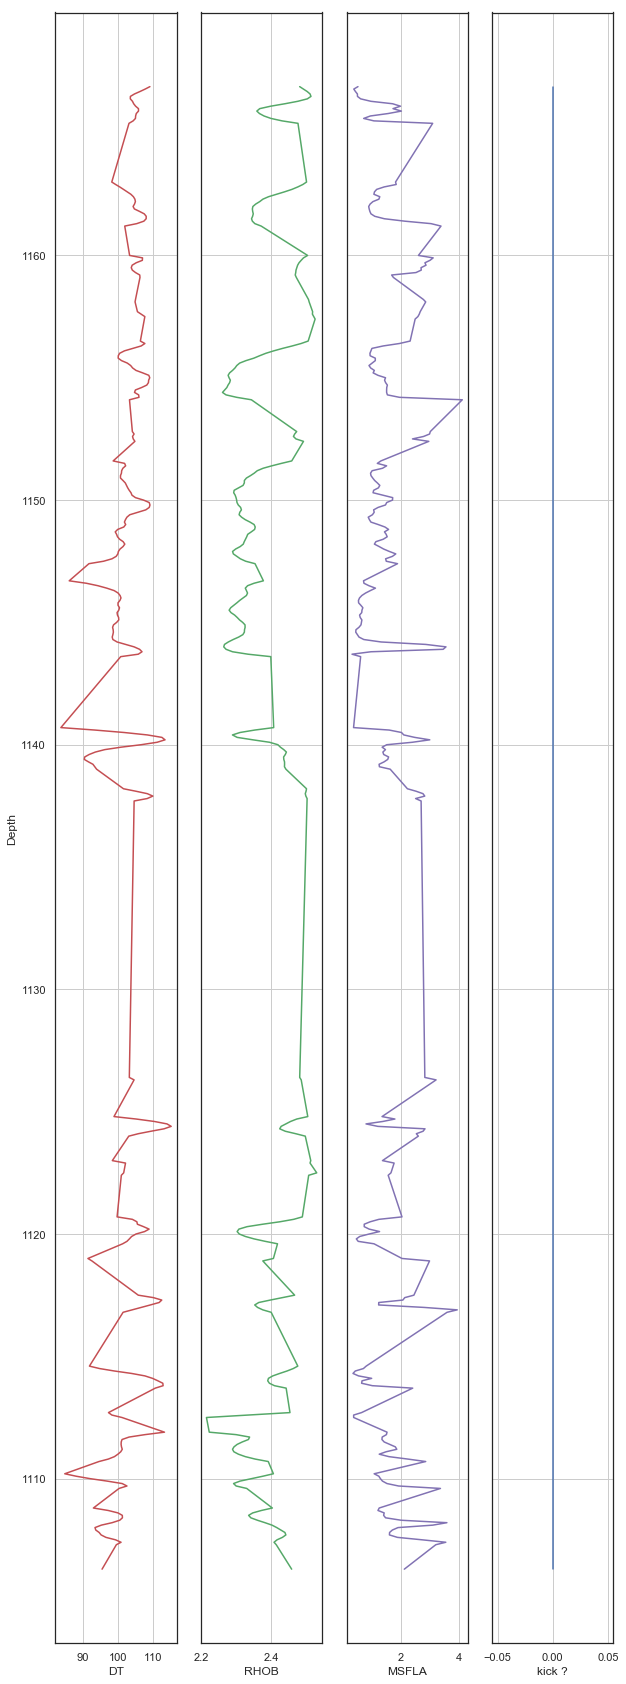

In [419]:
fig, (ax1, ax2, ax3, ax5) = plt.subplots(1, 4,sharey=True,figsize=(10,30))

ax1.plot(kick_KPI.loc[_0].DT, kick_KPI.loc[_0].index,'r')
ax1.set(ylabel = 'Depth',xlabel = 'DT')
ax1.yaxis.grid()
ax1.xaxis.grid()

ax2.plot(kick_KPI.loc[_0].RHOB, kick_KPI.loc[_0].index,'g')
ax2.set(xlabel='RHOB')
ax2.yaxis.grid()
ax2.xaxis.grid()

ax3.plot(kick_KPI.loc[_0].MSFLA,kick_KPI.loc[_0].index,'m')
ax3.set(xlabel='MSFLA')
ax3.yaxis.grid()
ax3.xaxis.grid()

#ax4.plot(kick_KPI.SP,kick_KPI.index)
#ax4.set(xlabel = 'SP')
#ax4.yaxis.grid()
#ax4.xaxis.grid()

ax5.plot(kick_KPI_scaled.loc[_0]['label_kmean'],kick_KPI_scaled.loc[_0].index)
ax5.set(xlabel = 'kick ?')
ax5.xaxis.grid()
ax5.yaxis.grid()

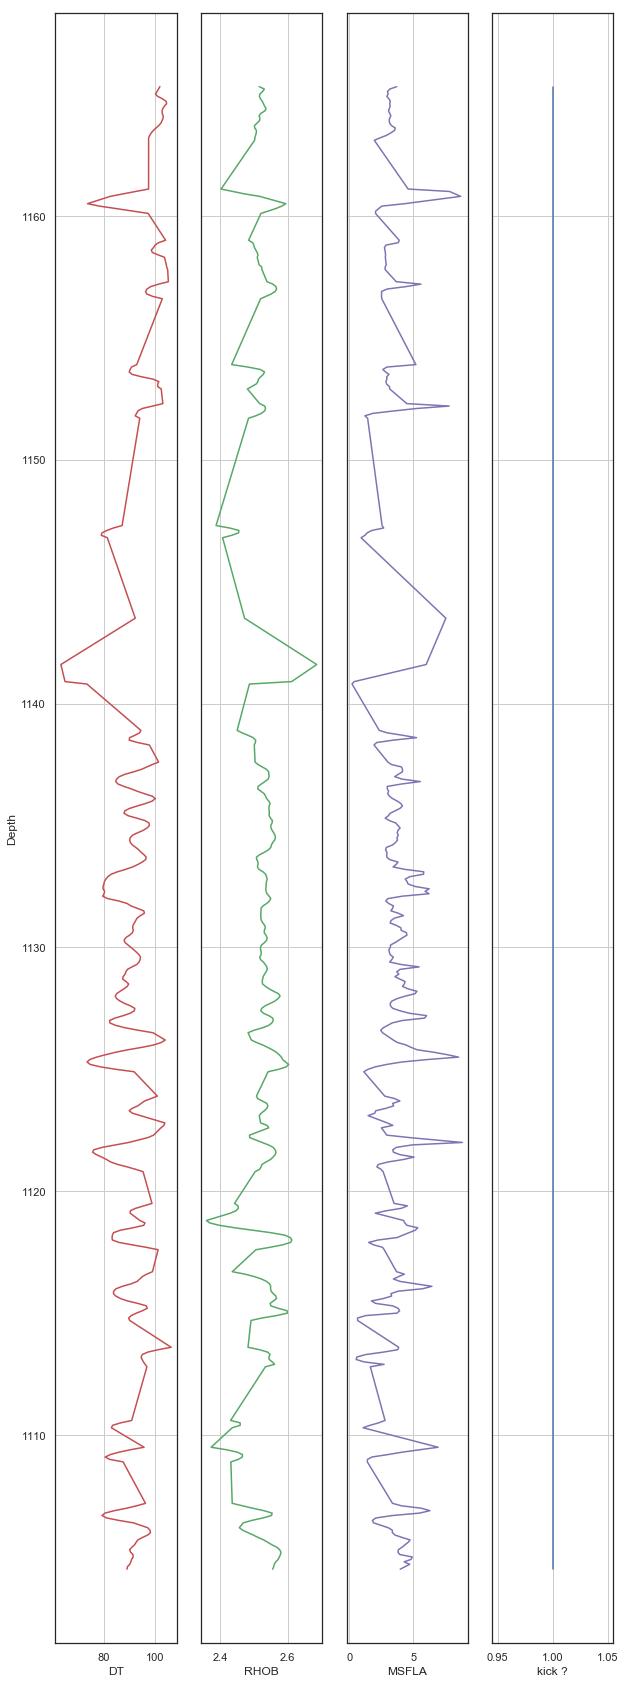

In [420]:
fig, (ax1, ax2, ax3, ax5) = plt.subplots(1, 4,sharey=True,figsize=(10,30))

ax1.plot(kick_KPI.loc[_1].DT, kick_KPI.loc[_1].index,'r')
ax1.set(ylabel = 'Depth',xlabel = 'DT')
ax1.yaxis.grid()
ax1.xaxis.grid()

ax2.plot(kick_KPI.loc[_1].RHOB, kick_KPI.loc[_1].index,'g')
ax2.set(xlabel='RHOB')
ax2.yaxis.grid()
ax2.xaxis.grid()

ax3.plot(kick_KPI.loc[_1].MSFLA,kick_KPI.loc[_1].index,'m')
ax3.set(xlabel='MSFLA')
ax3.yaxis.grid()
ax3.xaxis.grid()

#ax4.plot(kick_KPI.SP,kick_KPI.index)
#ax4.set(xlabel = 'SP')
#ax4.yaxis.grid()
#ax4.xaxis.grid()

ax5.plot(kick_KPI_scaled.loc[_1]['label_kmean'],kick_KPI_scaled.loc[_1].index)
ax5.set(xlabel = 'kick ?')
ax5.xaxis.grid()
ax5.yaxis.grid()

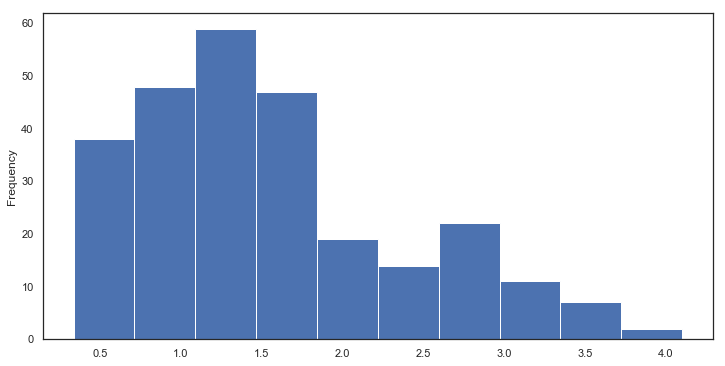

In [421]:
kick_KPI.loc[_0]['MSFLA'].plot(kind='hist')

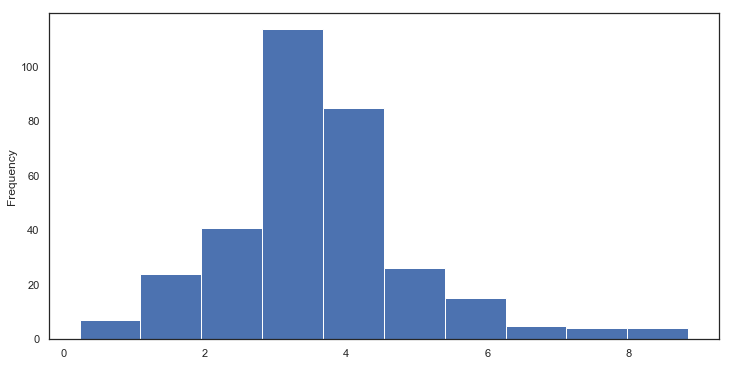

In [422]:
kick_KPI.loc[_1]['MSFLA'].plot(kind='hist')

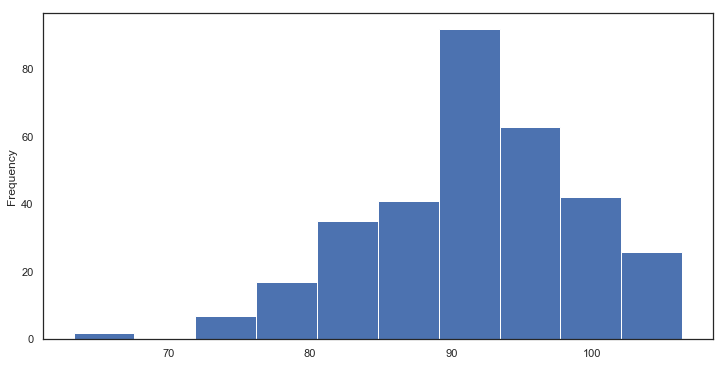

In [423]:
kick_KPI.loc[_1]['DT'].plot(kind='hist')


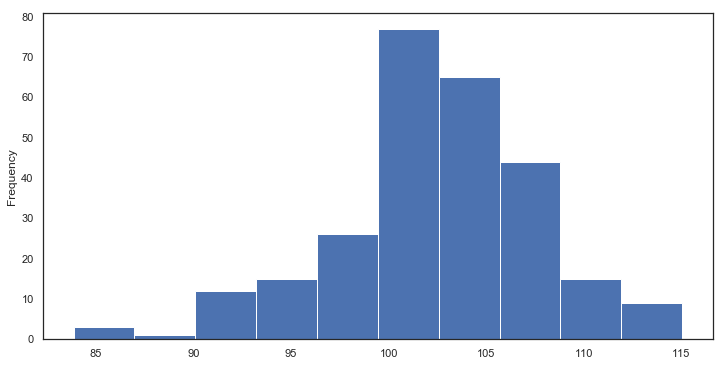

In [424]:
kick_KPI.loc[_0]['DT'].plot(kind='hist')

2.5237843076923063

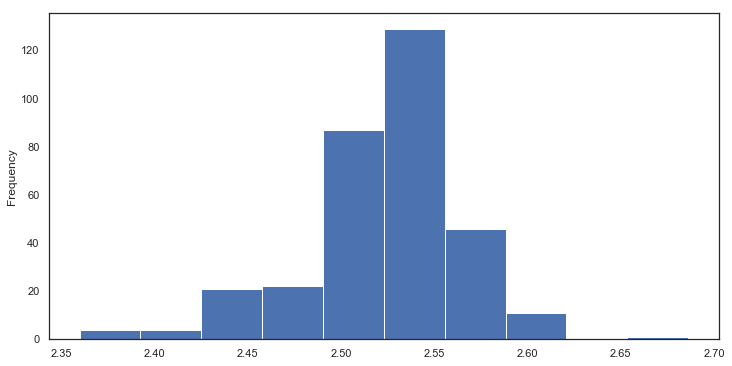

In [425]:
kick_KPI.loc[_1]['RHOB'].plot(kind='hist')

kick_KPI.loc[_1]['RHOB'].mean()

2.3796423220973786

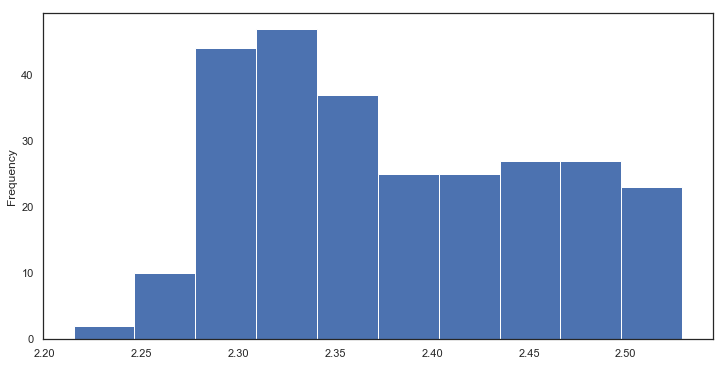

In [426]:
kick_KPI.loc[_0]['RHOB'].plot(kind='hist')

kick_KPI.loc[_0]['RHOB'].mean()